In [1]:
import pandas as pd
import numpy as np
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Datast

In [3]:
df=pd.read_csv("insurance.csv")
df.head()
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Cleaning

In [7]:
#check missing values
print(df.isnull().sum())
df.shape

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


(1338, 7)

#### data has no missing value 

## Testing and handling outliers

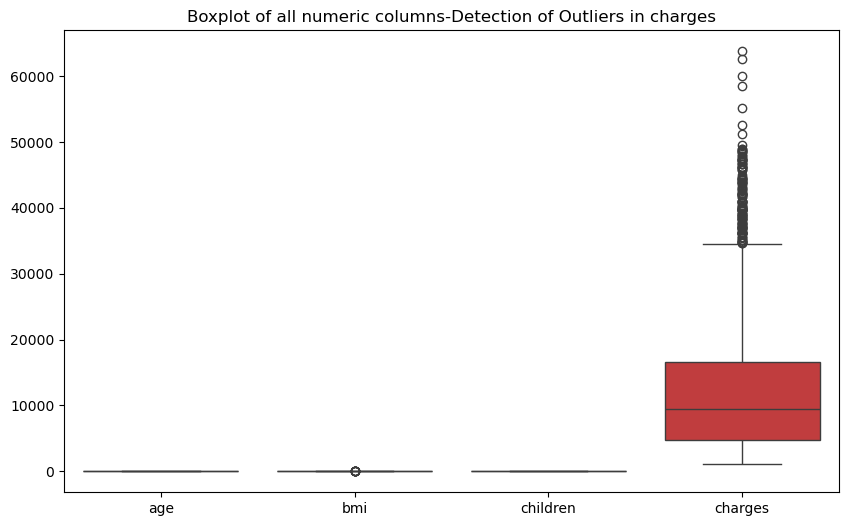

In [10]:
# Detect Outliers
num_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot of all numeric columns-Detection of Outliers in charges')
plt.show()

### from above plot we conclude only charges col has outliers

In [12]:
# we use IQR for this
for col in num_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower,upper=Q1-1.5*IQR,Q3+1.5*IQR
    df[col]=np.where(df[col]<lower,lower,
              np.where(df[col]>upper,upper,df[col]))


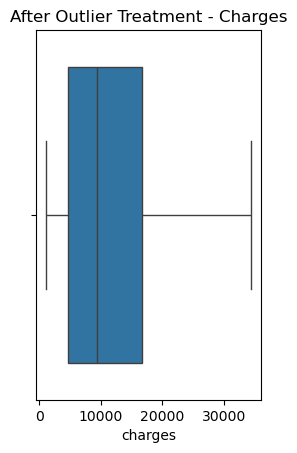

In [13]:
# Box plot after handling outliers in charges col
plt.subplot(1,2,2)
sns.boxplot(x=df['charges'])
plt.title("After Outlier Treatment - Charges")

plt.show()

### Handling Categorical variables

In [15]:
#First identify categorical columns
cat_cols=df.select_dtypes(include=['object']).columns
print("Categorical Columns:",cat_cols.tolist())


Categorical Columns: ['sex', 'smoker', 'region']


In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [17]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [18]:
# Use the Label Encoder for binary columns(sex and smoker) 
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,1,27.900,0.0,1,southwest,16884.92400
1,18.0,0,33.770,1.0,0,southeast,1725.55230
2,28.0,0,33.000,3.0,0,southeast,4449.46200
3,33.0,0,22.705,0.0,0,northwest,21984.47061
4,32.0,0,28.880,0.0,0,northwest,3866.85520


In [20]:
# One-hot encode the 'region' column
df=pd.get_dummies(df,columns=['region'],drop_first=True)
# Check the updated columns
print(df.head())

    age  sex     bmi  children  smoker      charges  region_northwest  \
0  19.0    1  27.900       0.0       1  16884.92400             False   
1  18.0    0  33.770       1.0       0   1725.55230             False   
2  28.0    0  33.000       3.0       0   4449.46200             False   
3  33.0    0  22.705       0.0       0  21984.47061              True   
4  32.0    0  28.880       0.0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [21]:
# Convert boolean region columns to numeric (0/1)
region_cols=['region_northwest', 'region_southeast', 'region_southwest']
df[region_cols]=df[region_cols].astype(int)
# Check the result
print(df.head())

    age  sex     bmi  children  smoker      charges  region_northwest  \
0  19.0    1  27.900       0.0       1  16884.92400                 0   
1  18.0    0  33.770       1.0       0   1725.55230                 0   
2  28.0    0  33.000       3.0       0   4449.46200                 0   
3  33.0    0  22.705       0.0       0  21984.47061                 1   
4  32.0    0  28.880       0.0       0   3866.85520                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


# Feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_features=['age','bmi','children']
df[numeric_features]=scaler.fit_transform(df[numeric_features])

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Test Linear Regression Assumptions

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [28]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

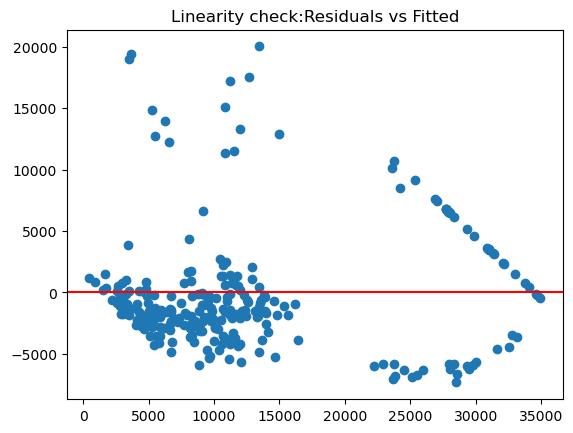

In [29]:
# 1.Linearity:Residuals vs Fitted
residuals=y_test-y_pred_lr
plt.scatter(y_pred_lr,residuals)
plt.axhline(0,color='red')
plt.title('Linearity check:Residuals vs Fitted')
plt.show()

In [30]:
!pip install statsmodels

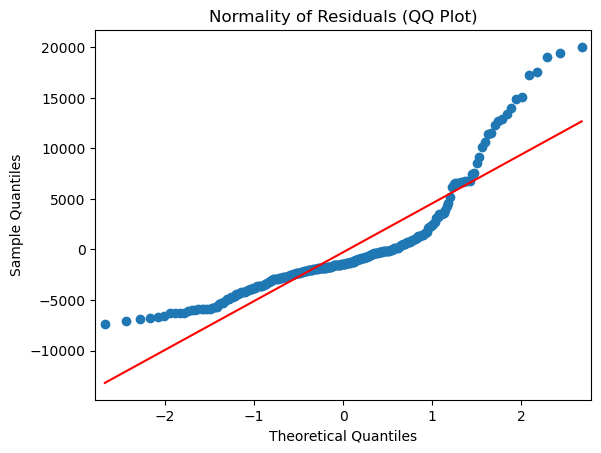

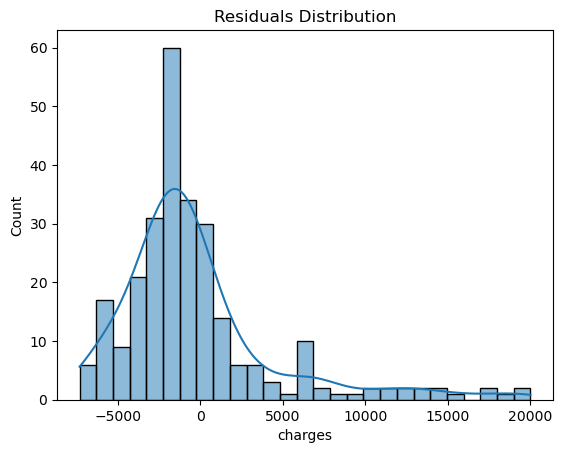

In [31]:
# 2.Normality of residuals
import statsmodels.api as sm
sm.qqplot(residuals,line='s')
plt.title("Normality of Residuals (QQ Plot)")
plt.show()
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [32]:
# 3. Homoskedasticity (Breusch-Pagan test)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test=het_breuschpagan(residuals,sm.add_constant(X_test))
print("Breusch-Pagan p-value:", bp_test[1])

Breusch-Pagan p-value: 0.5146933219969765


### Since the p-value > 0.05,  This means our residuals have homoscedasticity, which is good for linear regression assumptions.
#### Action: No transformation of the target variable (charges) is needed, and the model assumptions are satisfied.

In [34]:
# 4. Independence (Durbin-Watson test)
dw=sm.stats.durbin_watson(residuals)
print("Durbin-Watson statistic:",dw)

Durbin-Watson statistic: 2.235359314232505


### My value: 2.235 → Slightly above 2, indicating a very mild negative autocorrelation, but generally considered acceptable.

#### Conclusion: Residuals are fairly independent, so the linear regression assumption of independent errors holds.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# 5. Multicollinearity (VIF)
# Convert boolean columns to integers before calculating VIF
X_train_vif=X_train.copy()
for col in X_train_vif.columns:
    if X_train_vif[col].dtype=='bool':
        X_train_vif[col] = X_train_vif[col].astype(int)

vif_data=pd.DataFrame()
vif_data["feature"]=X_train_vif.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_vif.values, i)
                    for i in range(X_train_vif.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)


Variance Inflation Factors:
            feature       VIF
0               age  1.023572
1               sex  1.597759
2               bmi  1.080747
3          children  1.005728
4            smoker  1.189221
5  region_northwest  1.218594
6  region_southeast  1.352218
7  region_southwest  1.241089


#### I checked multicollinearity using VIF, all values were below 2, so features are independent. Lasso/Ridge aren’t strictly necessary, but I tried them for potential regularization benefits.”

### Define function for evaluation

In [40]:
def evaluate_model(name,model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test, y_pred)
    return[r2,adj_r2,rmse, mae]

results=pd.DataFrame(columns=["R2","Adjusted R2","RMSE","MAE"])


In [41]:
!pip install xgboost


## Baseline Models

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [44]:
lr_model=LinearRegression()
ridge_model=Ridge(alpha=1.0)
lasso_model=Lasso(alpha=0.01)
dt_model=DecisionTreeRegressor(random_state=42)
rf_model=RandomForestRegressor(random_state=42)

In [45]:
results.loc['Linear Regression']=evaluate_model('LR',lr_model,X_train,X_test,y_train,y_test)
results.loc['Ridge']=evaluate_model('Ridge',ridge_model,X_train,X_test,y_train,y_test)
results.loc['Lasso']=evaluate_model('Lasso',lasso_model,X_train,X_test,y_train,y_test)
results.loc['Decision Tree']=evaluate_model('DT',dt_model,X_train,X_test,y_train,y_test)
results.loc['Random Forest']=evaluate_model('RF',rf_model,X_train,X_test,y_train,y_test)


# Feature importance(Random Forest)

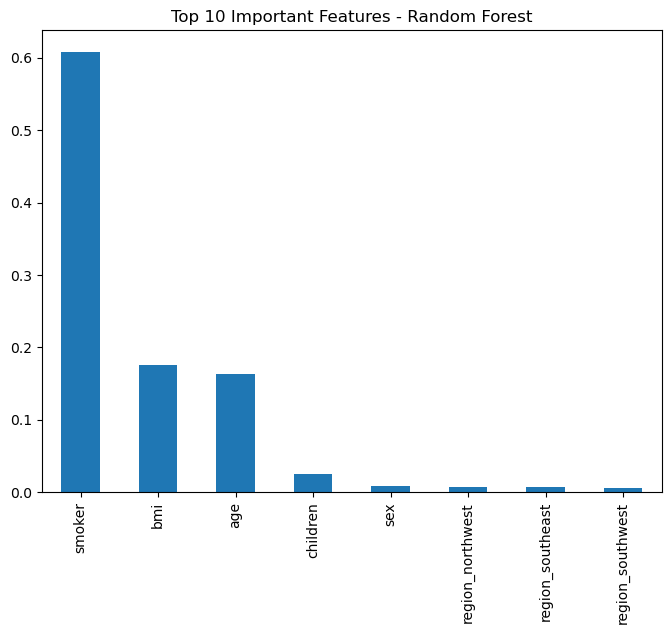

In [47]:
importances=pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Important Features - Random Forest")
plt.show()

#### This plot shows feature importance from the Random Forest model. It ranks input features based on how much they contribute to predicting insurance charges. The higher the bar, the more impact that feature has on the prediction, helping identify which factors (like smoker or bmi) drive medical insurance costs.

# SHAP Explainability

In [50]:
!pip install shap

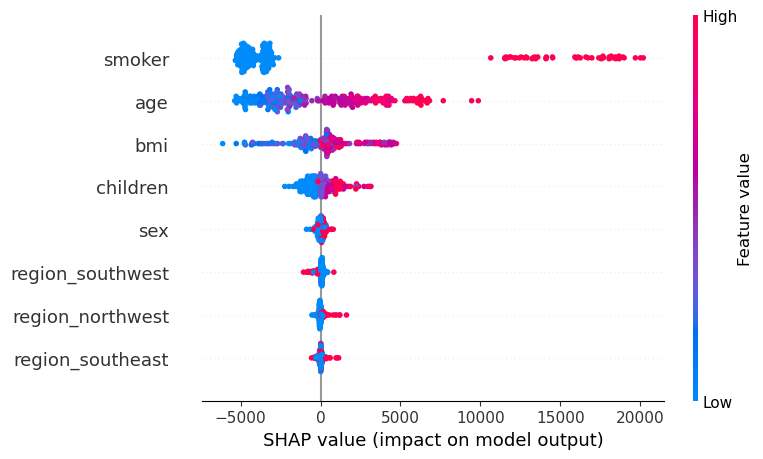

In [51]:
import shap
explainer=shap.TreeExplainer(rf_model) # Use the best_rf model
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

####  SHAP (SHapley Additive exPlanations) is a method to explain the output of machine learning models. It assigns each feature a contribution value showing how much it increases or decreases the predicted outcome, making complex models interpretable.

#### Smoker status,age and BMI are the main drivers of high medical claims. Insurers can target high-risk customers with wellness programs and adjust premiums based on these factors. Regional differences have minimal impact, so focus should be on individual risk profiling to manage claims effectively.

### "Feature importance from the Random Forest model shows the overall contribution of each feature to the prediction of medical insurance charges, providing a global view. SHAP values, on the other hand, explain the impact of each feature on individual predictions, showing both the magnitude and direction of influence. Using both methods gives a complete understanding of how features drive the model’s output."

## Comparision Table

In [56]:
print("\nModel Performance Comparison:")
print(results)


Model Performance Comparison:
                         R2  Adjusted R2         RMSE          MAE
Linear Regression  0.784100     0.777431  4841.211449  3316.732530
Ridge              0.783787     0.777108  4844.725163  3327.997707
Lasso              0.784099     0.777431  4841.219982  3316.740890
Decision Tree      0.688419     0.678795  5815.851725  2615.308244
Random Forest      0.837419     0.832397  4201.104727  2178.540255


# Visulisation of comparision

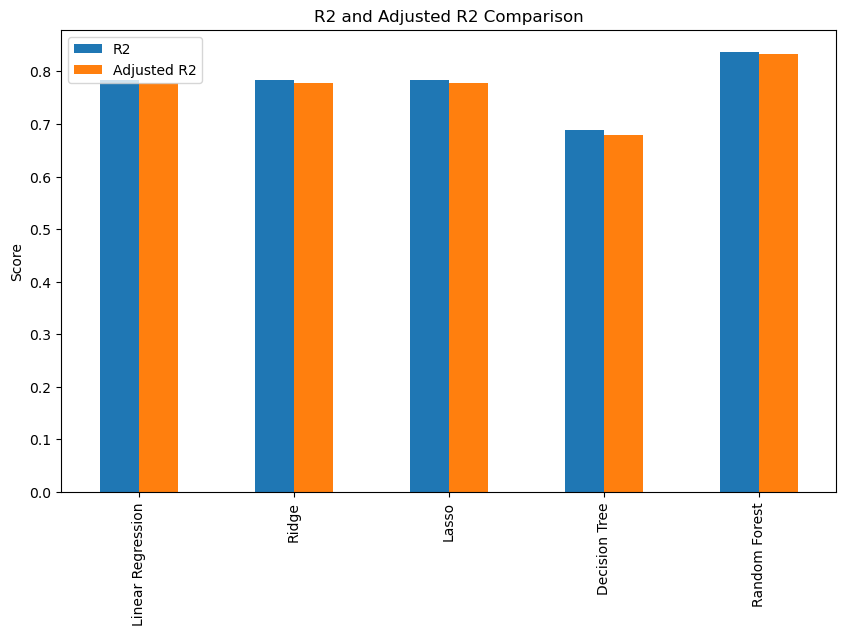

In [58]:
results[['R2','Adjusted R2']].plot(kind='bar', figsize=(10,6))
plt.title("R2 and Adjusted R2 Comparison")
plt.ylabel("Score")
plt.show()

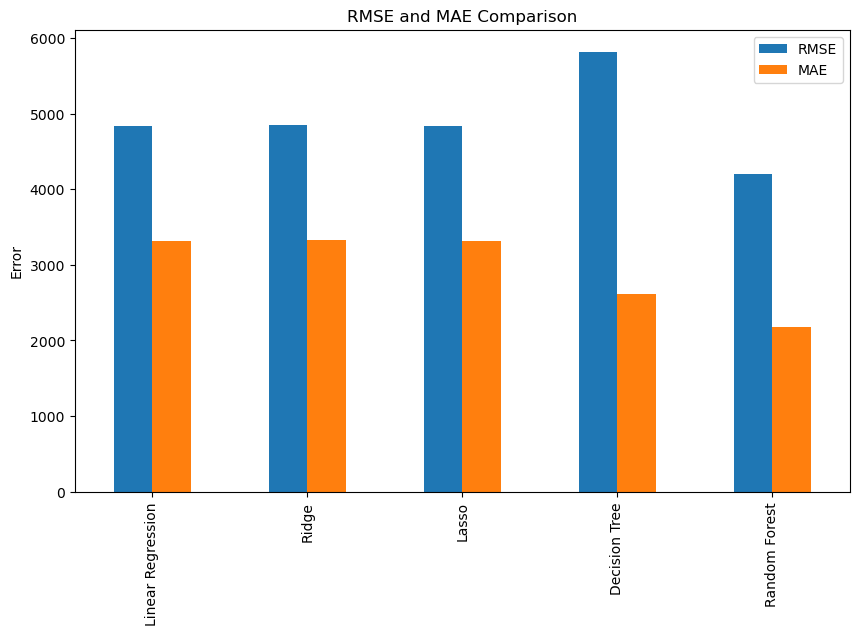

In [59]:
results[['RMSE','MAE']].plot(kind='bar', figsize=(10,6))
plt.title("RMSE and MAE Comparison")
plt.ylabel("Error")
plt.show()

# Model performance vs Business Insights

| Model             | R²    | RMSE | MAE  | Business Insight                                                               |
| ----------------- | ----- | ---- | ---- | ------------------------------------------------------------------------------ |
| Linear Regression | 0.784 | 4841 | 3317 | Captures linear trends; good for interpretable pricing rules.                  |
| Ridge Regression  | 0.784 | 4845 | 3328 | Similar to Linear; slightly more robust to multicollinearity.                  |
| Lasso Regression  | 0.784 | 4841 | 3317 | Helps identify key predictors by shrinking less important features.            |
| Decision Tree     | 0.688 | 5816 | 2615 | Can capture non-linearities but prone to overfitting; less reliable.           |
| Random Forest     | 0.837 | 4201 | 2179 | Best predictive accuracy; ideal for premium estimation & personalized pricing. |


# Final Summary

## Using historical customer data, I built predictive models to estimate medical insurance claim amounts. Random Forest performed best (R² = 0.837), accurately predicting charges based on age, BMI, smoking status, children, and region. Insights reveal that smokers and customers with higher BMI are more likely to file high-value claims, helping insurers identify high-risk profiles. This analysis enables optimized policy pricing, better risk management, and informed operational decisions for medical insurance providers.